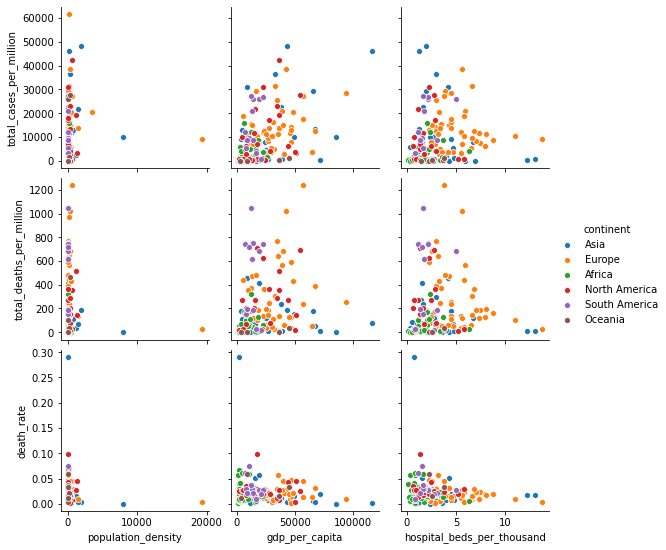

In [15]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns

# Load the data (create the DataFrame)
fields = ['iso_code','continent','location','date','total_cases','total_deaths','total_cases_per_million',
          'total_deaths_per_million','population_density','gdp_per_capita','hospital_beds_per_thousand']

# Add also death_rate column
df = pd.read_csv('owid-covid-data.csv', usecols = fields)
df['death_rate'] = df['total_deaths']/df['total_cases']

# Transform population density and gdp per capita these variables normally distributed
#df['log_gdp_per_capita'] = np.log10(df['gdp_per_capita'])
#df['log_population_density'] = np.log10(df['population_density'])

#df = df.drop(columns = ['gdp_per_capita','population_density'])

# Change DataFrame to the date we want
df = df.loc[df.date == '2020-11-01']
#df = df.drop([57264, 57588])

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])




In [16]:
from scipy.stats import pearsonr
values = []
pair1 = df.dropna(subset = ['population_density', 'death_rate'], how ='any')
values.append(pearsonr(pair1.population_density, pair1.death_rate))

pair2 = df.dropna(subset = ['population_density', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair2.population_density, pair2.total_deaths_per_million))

pair3 = df.dropna(subset = ['population_density', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair3.population_density, pair3.total_cases_per_million))

pair4 = df.dropna(subset = ['gdp_per_capita', 'death_rate'], how ='any')
values.append(pearsonr(pair4.gdp_per_capita, pair4.death_rate))

pair5 = df.dropna(subset = ['gdp_per_capita', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair5.gdp_per_capita, pair5.total_deaths_per_million))

pair6 = df.dropna(subset = ['gdp_per_capita', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair6.gdp_per_capita, pair6.total_cases_per_million))

pair7 = df.dropna(subset = ['hospital_beds_per_thousand', 'death_rate'], how ='any')
values.append(pearsonr(pair7.hospital_beds_per_thousand, pair7.death_rate))

pair8 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair8.hospital_beds_per_thousand, pair8.total_deaths_per_million))

pair9 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair9.hospital_beds_per_thousand, pair9.total_cases_per_million))
values

[(-0.10000678054586833, 0.1779879975116526),
 (-0.05839604309092561, 0.43232199566836),
 (0.06212552468435703, 0.3809567742472207),
 (-0.14964721668101186, 0.0507541053853956),
 (0.25414027511007625, 0.0007959951122337701),
 (0.5159805146941862, 5.618971519923782e-14),
 (-0.18478793107685318, 0.02221419430361987),
 (0.05865566421930701, 0.47140127354003125),
 (0.14237884604243914, 0.06643416906278975)]

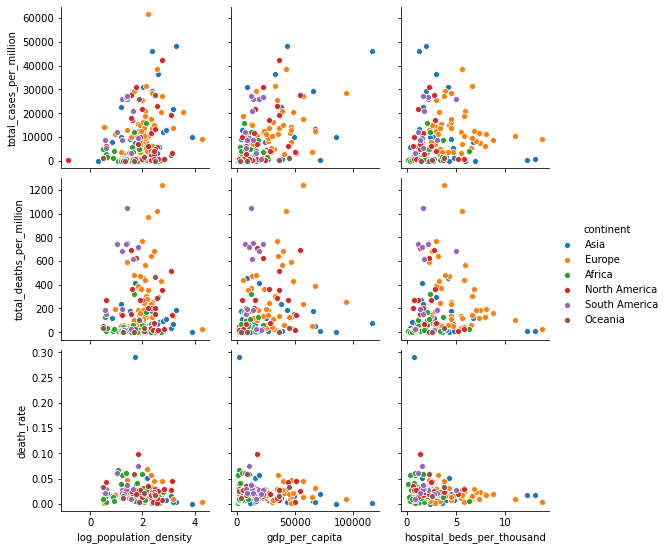

In [17]:
# Take the log of population_density
df['log_population_density'] = np.log10(df['population_density'])
df = df.drop(columns = ['population_density'])

# Change DataFrame to the date we want
df = df.loc[df.date == '2020-11-01']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['log_population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])

In [18]:
# New Pearson Coefficients and p_values with log_population_density
values = []
pair1 = df.dropna(subset = ['log_population_density', 'death_rate'], how ='any')
values.append(pearsonr(pair1.log_population_density, pair1.death_rate))

pair2 = df.dropna(subset = ['log_population_density', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair2.log_population_density, pair2.total_deaths_per_million))

pair3 = df.dropna(subset = ['log_population_density', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair3.log_population_density, pair3.total_cases_per_million))

pair4 = df.dropna(subset = ['gdp_per_capita', 'death_rate'], how ='any')
values.append(pearsonr(pair4.gdp_per_capita, pair4.death_rate))

pair5 = df.dropna(subset = ['gdp_per_capita', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair5.gdp_per_capita, pair5.total_deaths_per_million))

pair6 = df.dropna(subset = ['gdp_per_capita', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair6.gdp_per_capita, pair6.total_cases_per_million))

pair7 = df.dropna(subset = ['hospital_beds_per_thousand', 'death_rate'], how ='any')
values.append(pearsonr(pair7.hospital_beds_per_thousand, pair7.death_rate))

pair8 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair8.hospital_beds_per_thousand, pair8.total_deaths_per_million))

pair9 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair9.hospital_beds_per_thousand, pair9.total_cases_per_million))
values

[(-0.1308414015697836, 0.07748667377608698),
 (0.011638295709722593, 0.8757441918265428),
 (0.19801694084984497, 0.004835056318616377),
 (-0.14964721668101186, 0.0507541053853956),
 (0.25414027511007625, 0.0007959951122337701),
 (0.5159805146941862, 5.618971519923782e-14),
 (-0.18478793107685318, 0.02221419430361987),
 (0.05865566421930701, 0.47140127354003125),
 (0.14237884604243914, 0.06643416906278975)]

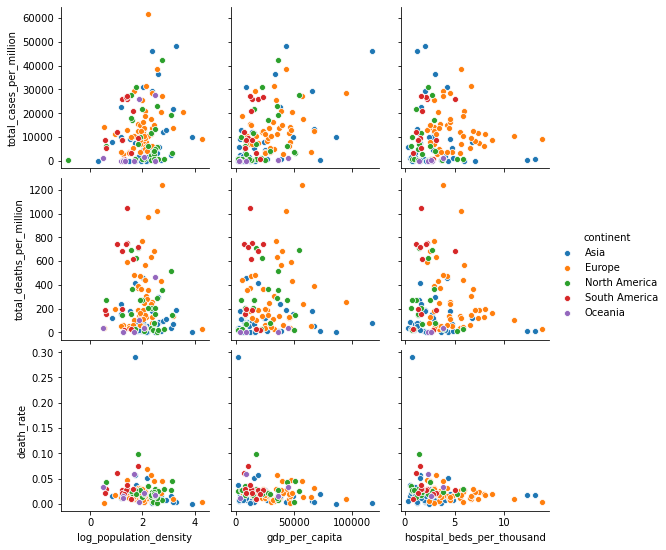

In [19]:
# Without African continent
df = df.loc[df.continent != 'Africa']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['log_population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])

In [20]:
# New Pearson Coefficients and p_values with log_population_density
values = []
pair1 = df.dropna(subset = ['log_population_density', 'death_rate'], how ='any')
values.append(pearsonr(pair1.log_population_density, pair1.death_rate))

pair2 = df.dropna(subset = ['log_population_density', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair2.log_population_density, pair2.total_deaths_per_million))

pair3 = df.dropna(subset = ['log_population_density', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair3.log_population_density, pair3.total_cases_per_million))

pair4 = df.dropna(subset = ['gdp_per_capita', 'death_rate'], how ='any')
values.append(pearsonr(pair4.gdp_per_capita, pair4.death_rate))

pair5 = df.dropna(subset = ['gdp_per_capita', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair5.gdp_per_capita, pair5.total_deaths_per_million))

pair6 = df.dropna(subset = ['gdp_per_capita', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair6.gdp_per_capita, pair6.total_cases_per_million))

pair7 = df.dropna(subset = ['hospital_beds_per_thousand', 'death_rate'], how ='any')
values.append(pearsonr(pair7.hospital_beds_per_thousand, pair7.death_rate))

pair8 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair8.hospital_beds_per_thousand, pair8.total_deaths_per_million))

pair9 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair9.hospital_beds_per_thousand, pair9.total_cases_per_million))
values

[(-0.14181380395947382, 0.10479723796755963),
 (-0.08292833911571879, 0.34448450254104646),
 (0.1728581593785527, 0.035647846339191235),
 (-0.19220279620467573, 0.03545802958538716),
 (0.07906379121462022, 0.3906827716903141),
 (0.41722196227497715, 6.464125600262897e-07),
 (-0.20740525000134544, 0.02614040027613439),
 (-0.08402410740580968, 0.3719670375828482),
 (0.009615737576082355, 0.9145550311803582)]

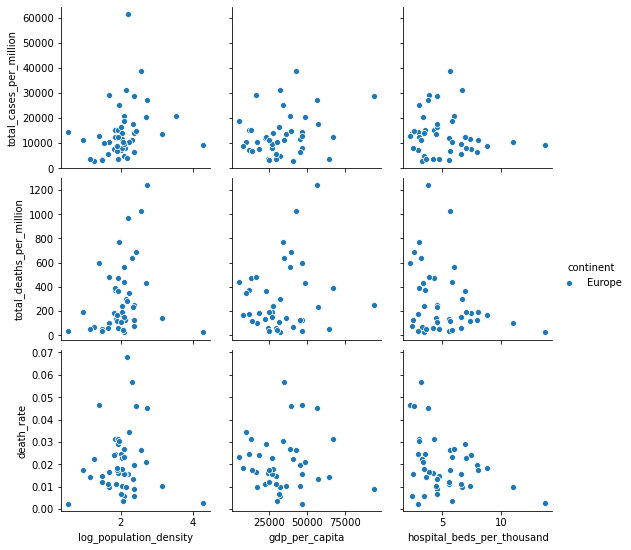

In [21]:
# Only European countries
df = df.loc[df.continent == 'Europe']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['log_population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])

In [22]:
# New Pearson Coefficients and p_values with log_population_density
values = []
pair1 = df.dropna(subset = ['log_population_density', 'death_rate'], how ='any')
values.append(pearsonr(pair1.log_population_density, pair1.death_rate))

pair2 = df.dropna(subset = ['log_population_density', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair2.log_population_density, pair2.total_deaths_per_million))

pair3 = df.dropna(subset = ['log_population_density', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair3.log_population_density, pair3.total_cases_per_million))

pair4 = df.dropna(subset = ['gdp_per_capita', 'death_rate'], how ='any')
values.append(pearsonr(pair4.gdp_per_capita, pair4.death_rate))

pair5 = df.dropna(subset = ['gdp_per_capita', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair5.gdp_per_capita, pair5.total_deaths_per_million))

pair6 = df.dropna(subset = ['gdp_per_capita', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair6.gdp_per_capita, pair6.total_cases_per_million))

pair7 = df.dropna(subset = ['hospital_beds_per_thousand', 'death_rate'], how ='any')
values.append(pearsonr(pair7.hospital_beds_per_thousand, pair7.death_rate))

pair8 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_deaths_per_million'], how ='any')
values.append(pearsonr(pair8.hospital_beds_per_thousand, pair8.total_deaths_per_million))

pair9 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_cases_per_million'], how ='any')
values.append(pearsonr(pair9.hospital_beds_per_thousand, pair9.total_cases_per_million))
values

[(0.04222409124169624, 0.7805359308183792),
 (0.22558643016785127, 0.13170781897874312),
 (0.24183824672958237, 0.09771730017619776),
 (-0.008023382001364474, 0.959780521972391),
 (0.15091629606332213, 0.3400774022045147),
 (0.25657674964297883, 0.1009606276596214),
 (-0.3391524340745235, 0.02609212624022886),
 (-0.2758942787237883, 0.07332773594099684),
 (-0.13100942430976165, 0.40237376043772016)]

In [23]:
df.to_csv(r'owid-new-data.csv')